# Регресія на головні компоненти

## Yuriy Ryzkin

### Варіант 4

In [209]:
path_to_folder <- paste(dirname(getwd()),'/lab1/data',sep = '')
filenames = list.files(path = path_to_folder,full.names = TRUE)

In [210]:
#create list with dataframes from /data folder
datalist = lapply(filenames,
                  function (x){
                      a <- unlist(strsplit(x,'[_.]'));
                      company <- a[length(a)-1];
                      x0<- read.csv(x,header = F)[,c(1,6)];# using ol
                      colnames(x0)<-c('date',company);
                      x0;
                  })
#merge tables to one
y<-Reduce(function(x,y) {merge(x,y,by="date")}, datalist)

In [211]:
df<-y[-nrow(y),-1]
df$tomorrow_apd <- y$apd[-1]
number_rows<-nrow(df)

head(df)

,amgn,amp,amt,amzn,an,anf,aon,apa,apc,apd,tomorrow_apd
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598,46.0207,46.3674
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416,46.3674,45.0466
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754,45.0466,44.7825
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374,44.7825,45.3108
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276,45.3108,44.8073
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134,44.8073,44.6422


In [212]:
data_test <- df[(number_rows-19):number_rows,]
data_model1 <- df[0:(number_rows-20),]
data_model2 <- df[(number_rows-69):(number_rows-20),]

Минулого разу ми прогнозували ціну tomorrow_apd використовуючи всі інші дані. Цього разу прогнозувати будемо ту ж змінну

In [213]:
head(data_model1[,1:9])

,amgn,amp,amt,amzn,an,anf,aon,apa,apc
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,76.6332,29.6218,24.1784,45.99,19.86,44.4525,28.5404,70.9727,45.7598
2,77.1332,29.2406,24.0615,44.90,19.82,43.6285,28.6119,67.7776,43.4416
3,75.1332,29.0327,23.4377,44.47,19.50,43.2032,28.8173,65.2821,42.0754
4,72.9025,28.9114,23.3305,44.03,19.30,45.8170,28.3797,62.0681,41.9374
5,74.0948,29.0240,23.5547,43.66,19.29,46.1359,28.4154,62.8432,42.7276
6,73.8929,28.6428,23.0772,43.78,19.21,45.2056,27.9508,62.4178,42.4134


Беремо всі дані без даних за сьогоднішу ціну прогнозованої компанії, а також без вчорашнього. Поміщаємо це в X_train. Y_train - це те, що ми хочемо спрогнозувати

In [214]:
data_model1_X_train <- data_model1[,1:9]
data_model2_X_train <- data_model2[,1:9]
data_model1_Y_train <- data_model1[,11]
data_model2_Y_train <- data_model2[,11]

In [215]:
PC_1 <- princomp(data_model1_X_train,cor =  T)
summary(PC_1)

Importance of components:
                          Comp.1    Comp.2    Comp.3    Comp.4     Comp.5
Standard deviation     2.3338095 1.2753232 1.1042033 0.5091125 0.42736009
Proportion of Variance 0.6051852 0.1807166 0.1354739 0.0287995 0.02029296
Cumulative Proportion  0.6051852 0.7859018 0.9213757 0.9501752 0.97046814
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.34661860 0.244554450 0.232846653 0.177814149
Proportion of Variance 0.01334938 0.006645209 0.006024174 0.003513097
Cumulative Proportion  0.98381752 0.990462729 0.996486903 1.000000000

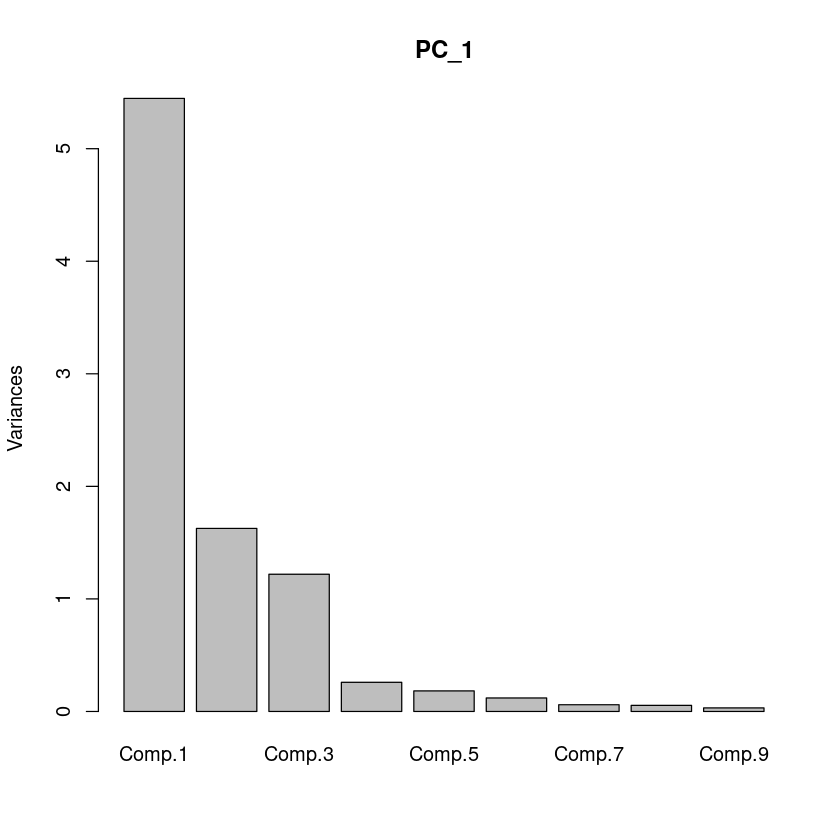

In [216]:
plot(PC_1)

In [217]:
PC_2 <- princomp(data_model2_X_train,cor =  T)
summary(PC_2)

Importance of components:
                          Comp.1    Comp.2     Comp.3     Comp.4     Comp.5
Standard deviation     1.9706957 1.8174491 0.82283239 0.73265507 0.53669983
Proportion of Variance 0.4315157 0.3670135 0.07522813 0.05964261 0.03200519
Cumulative Proportion  0.4315157 0.7985292 0.87375736 0.93339997 0.96540516
                           Comp.6      Comp.7      Comp.8      Comp.9
Standard deviation     0.37925394 0.271733883 0.222747023 0.209915463
Proportion of Variance 0.01598151 0.008204367 0.005512915 0.004896056
Cumulative Proportion  0.98138666 0.989591029 0.995103944 1.000000000

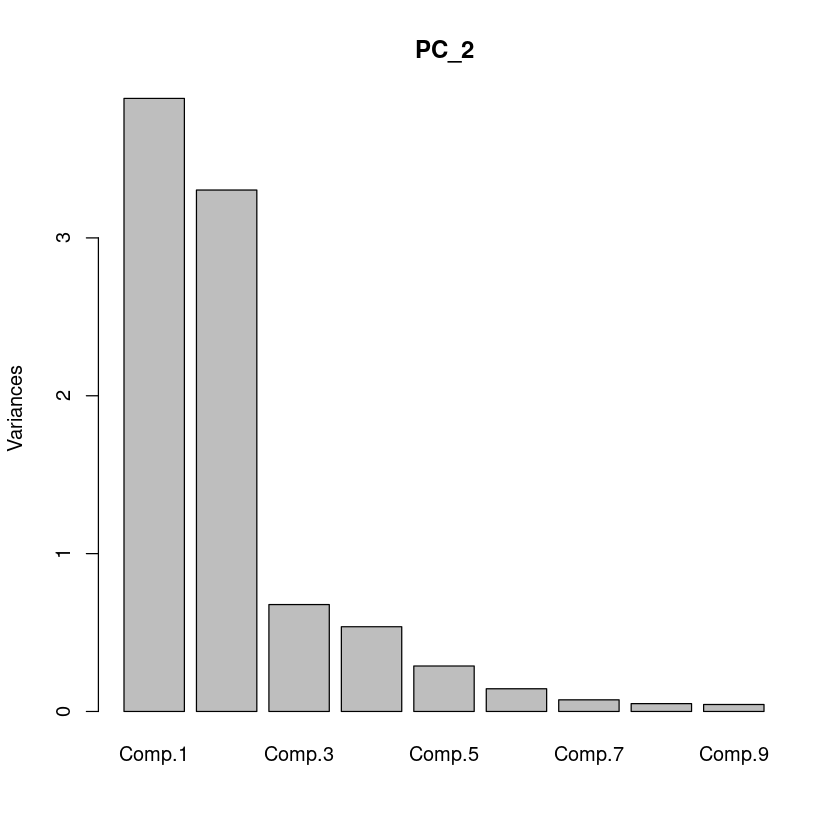

In [218]:
plot(PC_2)

In [230]:
loadings(PC_2)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
amgn  0.444  0.113  0.161  0.426         0.692         0.285       
amp         -0.538                       0.145  0.176 -0.314  0.744
amt   0.457  0.184  0.227               -0.120  0.345 -0.730 -0.189
amzn -0.236 -0.425 -0.343  0.248 -0.408  0.232  0.350        -0.487
an    0.385 -0.148 -0.513 -0.504  0.201  0.316 -0.336 -0.155 -0.189
anf   0.438         0.108 -0.337 -0.714 -0.163         0.335  0.146
aon   0.221 -0.438  0.203  0.445        -0.222 -0.657 -0.121 -0.134
apa  -0.166 -0.370  0.688 -0.432  0.160  0.264               -0.278
apc   0.346 -0.351 -0.111         0.491 -0.432  0.408  0.361 -0.124

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.667  0.778  0.889  1.

Судячи з даних варто спробувати використати регресію на 3 компоненти

In [220]:
data1 <- data.frame(PC_1$scores)

colnames(data1) <- c('first','second','third','forth','5','6','7','8','9')

model_1 <- lm(data_model1_Y_train~first+second+third+forth,data = data1)

In [221]:
model_1


Call:
lm(formula = data_model1_Y_train ~ first + second + third + forth, 
    data = data1)

Coefficients:
(Intercept)        first       second        third        forth  
    71.0899       4.6994      -5.1897       0.2137       1.8452  


In [222]:
data2 <- data.frame(PC_2$scores)

colnames(data2) <- c('first','second','third','forth','5','6','7','8','9')

model_2 <- lm(data_model2_Y_train~first+second+third+forth,data = data2)
 

In [223]:
model_2


Call:
lm(formula = data_model2_Y_train ~ first + second + third + forth, 
    data = data2)

Coefficients:
(Intercept)        first       second        third        forth  
    93.2315      -0.2393      -0.8738       0.1917      -0.3052  


In [224]:
y_pred <- data_test$tomorrow_apd

In [225]:
y_pred

[1]  96.60  95.48  96.37  96.74  97.01  97.81 100.67 100.57 107.10 104.08
[11] 104.59 105.63 108.72 107.33 106.95 107.87 106.86 106.71 106.61 106.67

In [226]:
PC_test <- princomp(data_test[,1:9],cor =  T)
data_X_test <- data.frame(PC_test$scores)
rownames(data_X_test) <- 1:nrow(data_X_test)
colnames(data_X_test) <- c('first','second','third','forth','5','6','7','8','9')

In [227]:
cat('MAE:\nPC_1: ',mae(y_pred,predict(model_1,data_X_test)),
     '\nPC_2 :',mae(y_pred,predict(model_2,data_X_test)))

MAE:
PC_1:  31.92864 
PC_2 : 9.787028

In [228]:
cat('MSE:\nPC_1:  ',mse(y_pred,predict(model_1,data_X_test)),
     '\nPC_2 :',mse(y_pred,predict(model_2,data_X_test)))

MSE:
PC_1:   1101.143 
PC_2 : 120.3974

In [174]:
y_pred

[1]  96.60  95.48  96.37  96.74  97.01  97.81 100.67 100.57 107.10 104.08
[11] 104.59 105.63 108.72 107.33 106.95 107.87 106.86 106.71 106.61 106.67

PC_2 показує кращі результати. Давайте порівняємо цю модель з результатами з минулих лабораторних. 

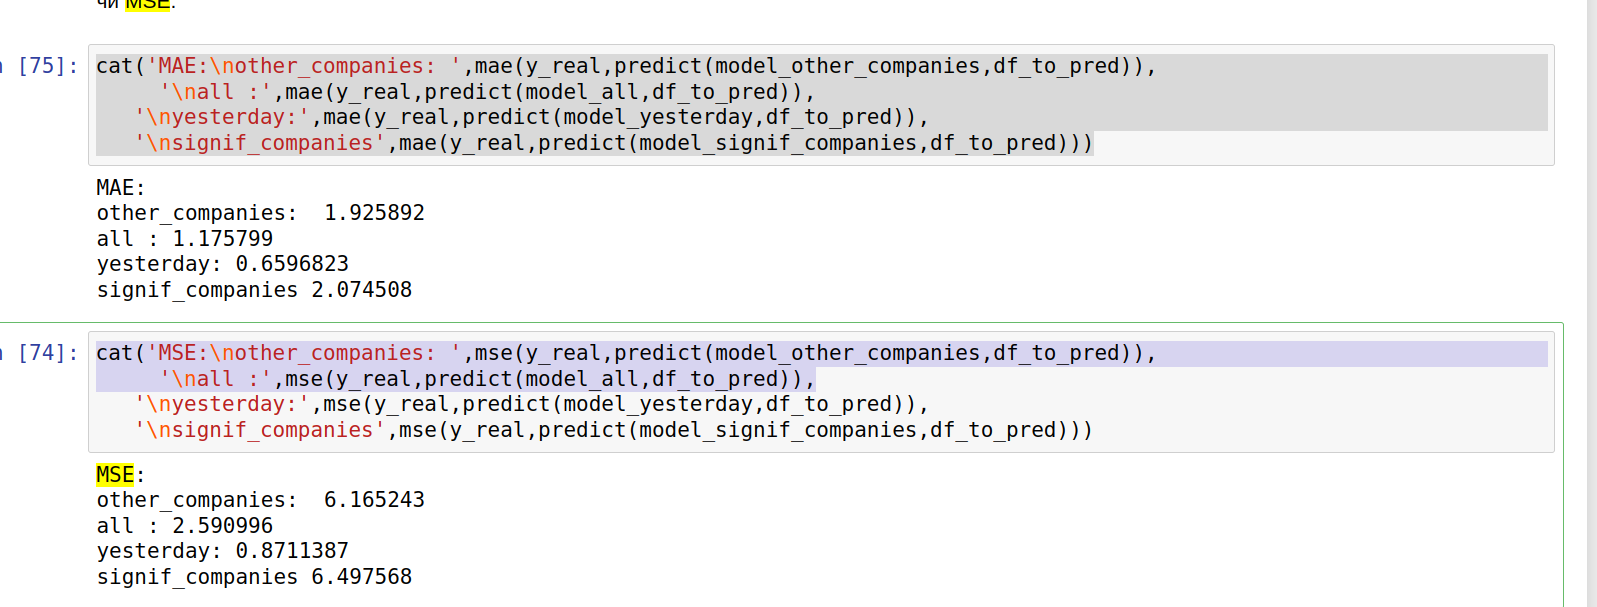

Ми можемо побачити, що наша регресія, що побудована на перших чотирьох компонентах і близько не стоїть поруч з звичайною регресією. 
MAE найкращої моделі з PCA в 15 разів гірше за найкращу модель минулої лабораторної  

In [233]:
loadings(PC_2)


Loadings:
     Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
amgn  0.444  0.113  0.161  0.426         0.692         0.285       
amp         -0.538                       0.145  0.176 -0.314  0.744
amt   0.457  0.184  0.227               -0.120  0.345 -0.730 -0.189
amzn -0.236 -0.425 -0.343  0.248 -0.408  0.232  0.350        -0.487
an    0.385 -0.148 -0.513 -0.504  0.201  0.316 -0.336 -0.155 -0.189
anf   0.438         0.108 -0.337 -0.714 -0.163         0.335  0.146
aon   0.221 -0.438  0.203  0.445        -0.222 -0.657 -0.121 -0.134
apa  -0.166 -0.370  0.688 -0.432  0.160  0.264               -0.278
apc   0.346 -0.351 -0.111         0.491 -0.432  0.408  0.361 -0.124

               Comp.1 Comp.2 Comp.3 Comp.4 Comp.5 Comp.6 Comp.7 Comp.8 Comp.9
SS loadings     1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000  1.000
Proportion Var  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111  0.111
Cumulative Var  0.111  0.222  0.333  0.444  0.556  0.667  0.778  0.889  1.

У створенні головних компонент повпливати всі початкові регресори. 